# Lending Club

## Linear Classification

<a name="top">
    
# Table of Contents 

[PART A - DATA CLEANING & FEATURE ENGINEERING](#parta)<br>

1. [Import Data](#import)<br>
2. [Inspecting the Data](#inspect)<br>
3. [Cleaning the Data](#cleaning) <br>
* 3.1 [Converting non-mumerical parameters to numerical values](#numerical)<br>
* 3.2 [Remove Nulls](#removenulls)<br>
* 3.3 [Identify parameters with highest correlation](#correlation)<br>

[PART B - MODEL BUILDING](#partb)<br>
1. [ALL THREE VARIABLES](#all3)
* [Step 1 Prepare your data](#step1)  
* [Step 2 Create your model: Train the model](#step2)
* [Step 3 Determine the accuracy of your model](#step3)  
* [Step 4 Visualization](#step4)  
    * [Step 4.1 Confusion Matrix](#confusion)
    * [Step 4.2 ROC Receiver Operating Characteristic](#roc)
2. [Int rate % only](#int_only)
* [Step 1 Prepare your data](#step1-2)  
* [Step 2 Create your model: Train the model](#step2-2)
* [Step 3 Determine the accuracy of your model](#step3-2)  
* [Step 4 Visualization](#step4-2)  
    * [Step 4.1 Confusion Matrix](#confusion-2)
    * [Step 4.2 ROC Receiver Operating Characteristic](#roc-2)
3. [Int rate % and loan grade](#int_loan)
* [Step 1 Prepare your data](#step1-3)  
* [Step 2 Create your model: Train the model](#step2-3)
* [Step 3 Determine the accuracy of your model](#step3-3)  
* [Step 4 Visualization](#step4-3)  
    * [Step 4.1 Confusion Matrix](#confusion-3)
    * [Step 4.2 ROC Receiver Operating Characteristic](#roc-3)

<a name="parta"/>

# PART A - DATA CLEANING & FEATURE ENGINEERING

<a name="import"/>

# 1. Import Data 

[back to top](#top)

Let us pick up from where we have left off. 

In [206]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
#from sklearn.svm import SVC
from sklearn.datasets import make_classification

#%matplotlib inline



In [89]:
dataset = pd.read_csv("data/cleaned_LendingClub.csv")
dataset

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B
...,...,...,...,...,...,...,...,...,...,...
38700,Fully Paid,110000.0,Not Verified,4 years,MORTGAGE,8.07%,2500,home_improvement,36 months,A
38701,Fully Paid,18000.0,Not Verified,3 years,RENT,10.28%,8500,credit_card,36 months,C
38702,Fully Paid,100000.0,Not Verified,< 1 year,MORTGAGE,8.07%,5000,debt_consolidation,36 months,A
38703,Fully Paid,200000.0,Not Verified,< 1 year,MORTGAGE,7.43%,5000,other,36 months,A


<a name="inspect"/>

# 2. Inspecting the data

[back to top](#top)

Do you have any null values? This data is pretty clean

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38705 entries, 0 to 38704
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loan_paid     38705 non-null  int64  
 1   annual_inc    38705 non-null  float64
 2   verified      38705 non-null  float64
 3   yrs_employed  38705 non-null  int64  
 4   home_own      38705 non-null  float64
 5   int_rate_%    38705 non-null  float64
 6   debt_con      38705 non-null  float64
 7   loan_amnt     38705 non-null  int64  
 8   loan_term     38705 non-null  int64  
 9   loan_grade    38705 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 3.0 MB


In [182]:
dataset['loan_status'].value_counts(normalize=True)

Fully Paid     0.85945
Charged Off    0.14055
Name: loan_status, dtype: float64

In [156]:
dataset['purpose'].value_counts(normalize=True)

debt_consolidation    0.472161
credit_card           0.129363
other                 0.099160
home_improvement      0.074590
major_purchase        0.054670
small_business        0.046144
car                   0.038729
wedding               0.024157
medical               0.017310
moving                0.014443
house                 0.009534
vacation              0.009094
educational           0.008190
renewable_energy      0.002454
Name: purpose, dtype: float64

In [166]:
dataset['grade'].value_counts(normalize=True)

B    0.302209
A    0.250459
C    0.205090
D    0.134685
E    0.072626
F    0.026741
G    0.008190
Name: grade, dtype: float64

<a name="cleaning"/>

# 3. Cleaning the data

<a name="numerical"/>

## 3.1 Converting every non-numerical to numerical value

[back to top](#top)

In [199]:
#reset
dataset = pd.read_csv("data/cleaned_LendingClub.csv")

In [200]:

#Add new rows
#loan_paid (yes or no) to represent loan_status
dataset.insert(1, "loan_paid",0)
dataset.loc[dataset['loan_status']=="Fully Paid",'loan_paid']=1
dataset.drop(['loan_status'], axis=1,inplace=True)

#verified (yes=1 or source_verified =0.5 or no=0) to represent verification_status
dataset.insert(2, "verified",0)
dataset.loc[dataset['verification_status']=="Verified",'verified']=1
dataset.loc[dataset['verification_status']=="Source Verified",'verified']=0.5
dataset.drop(['verification_status'], axis=1,inplace=True)

#yrs_employed to represent represent emp_length
dataset["emp_length"].replace({"< 1 year": "0"}, inplace=True)
dataset.insert(3, "yrs_employed",dataset['emp_length'].str.replace(r'\D','').astype(int))
dataset.drop(['emp_length'], axis=1,inplace=True)

#home_own (yes=1, mortgage=0.5, rent=0) to represent home_ownership
dataset.insert(4, "home_own",0)
dataset.loc[dataset['home_ownership']=="OWN",'home_own']=1
dataset.loc[dataset['home_ownership']=="MORTGAGE",'home_own']=0.5
dataset.drop(['home_ownership'], axis=1,inplace=True)

#int_rate_ to represent represent int_rate
dataset.insert(5, "int_rate_%",dataset['int_rate'].str.rstrip('%').astype('float'))
dataset.drop(['int_rate'], axis=1,inplace=True)

#debt_con (yes=1, credit_card=0.5, no=0) to represent debt_consolidation
dataset.insert(6, "debt_con",0)
dataset.loc[dataset['purpose']=="debt_consolidation",'debt_con']=1
dataset.loc[dataset['purpose']=="credit_card",'debt_con']=0.5
dataset.drop(['purpose'], axis=1,inplace=True)

#loan_term to represent represent term
dataset.insert(8, "loan_term",dataset['term'].str.replace(r'\D','').astype(int))
dataset.drop(['term'], axis=1,inplace=True)

#loan_grade (A-G,7-0) to represent grade
dataset['loan_grade'] = 0
dataset.loc[dataset['grade']=="A",'loan_grade']=6
dataset.loc[dataset['grade']=="B",'loan_grade']=5
dataset.loc[dataset['grade']=="C",'loan_grade']=4
dataset.loc[dataset['grade']=="D",'loan_grade']=3
dataset.loc[dataset['grade']=="E",'loan_grade']=2
dataset.loc[dataset['grade']=="F",'loan_grade']=1
dataset.loc[dataset['grade']=="G",'loan_grade']=0
dataset.drop(['grade'], axis=1,inplace=True)

dataset

/var/folders/m6/fxj587w93gn106xqhsxs8g7r0000gn/T/ipykernel_15158/59693578.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset.insert(3, "yrs_employed",dataset['emp_length'].str.replace(r'\D','').astype(int))
/var/folders/m6/fxj587w93gn106xqhsxs8g7r0000gn/T/ipykernel_15158/59693578.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset.insert(8, "loan_term",dataset['term'].str.replace(r'\D','').astype(int))


,loan_paid,annual_inc,verified,yrs_employed,home_own,int_rate_%,debt_con,loan_amnt,loan_term,loan_grade
0,1,24000.0,1.0,10,0.0,10.65,0.5,5000,36,5
1,0,30000.0,0.5,0,0.0,15.27,0.0,2500,60,4
2,1,12252.0,0.0,10,0.0,15.96,0.0,2400,36,4
3,1,49200.0,0.5,10,0.0,13.49,0.0,10000,36,4
4,1,80000.0,0.5,1,0.0,12.69,0.0,3000,60,5
...,...,...,...,...,...,...,...,...,...,...
38700,1,110000.0,0.0,4,0.5,8.07,0.0,2500,36,6
38701,1,18000.0,0.0,3,0.0,10.28,0.5,8500,36,4
38702,1,100000.0,0.0,0,0.5,8.07,1.0,5000,36,6
38703,1,200000.0,0.0,0,0.5,7.43,0.0,5000,36,6


<a name="removenulls"/>

## 3.2 Remove nulls

[back to top](#top)

In [201]:
dataset.isnull().values.any()

False

In [202]:
dataset.isnull().values.mean()

0.0

In [203]:
dataset.shape

(38705, 10)

<a name="correlation"/>

## 3.3 Identify parameters with highest correlation

[back to top](#top)

In [205]:
dataset.corr()

,loan_paid,annual_inc,verified,yrs_employed,home_own,int_rate_%,debt_con,loan_amnt,loan_term,loan_grade
loan_paid,1.000000,0.038905,-0.043782,-0.013085,0.018241,-0.200111,-0.006485,-0.053193,-0.151221,0.193650
annual_inc,0.038905,1.000000,0.128609,0.111717,0.123586,0.050614,-0.025453,0.268672,0.046435,-0.052457
verified,-0.043782,0.128609,1.000000,0.093299,0.036009,0.214416,0.082453,0.421443,0.260829,-0.196053
yrs_employed,-0.013085,0.111717,0.093299,1.000000,0.216527,0.006727,0.022744,0.155520,0.113796,-0.004146
home_own,0.018241,0.123586,0.036009,0.216527,1.000000,-0.057929,-0.071343,0.113178,0.075074,0.052509
int_rate_%,-0.200111,0.050614,0.214416,0.006727,-0.057929,1.000000,0.111894,0.308663,0.453779,-0.948552
debt_con,-0.006485,-0.025453,0.082453,0.022744,-0.071343,0.111894,1.000000,0.208190,0.043654,-0.100397
loan_amnt,-0.053193,0.268672,0.421443,0.155520,0.113178,0.308663,0.208190,1.000000,0.361222,-0.289297
loan_term,-0.151221,0.046435,0.260829,0.113796,0.075074,0.453779,0.043654,0.361222,1.000000,-0.432002
loan_grade,0.193650,-0.052457,-0.196053,-0.004146,0.052509,-0.948552,-0.100397,-0.289297,-0.432002,1.000000


In [204]:
abs_cor=abs(dataset.corr())
high_cor = abs_cor['loan_paid']>0.1
abs_cor['loan_paid'][high_cor].sort_values(ascending=False).to_frame()

,loan_paid
loan_paid,1.000000
int_rate_%,0.200111
loan_grade,0.193650
loan_term,0.151221


percentage of people have covid

plot a pie chart with percentages

<AxesSubplot:ylabel='loan_paid'>

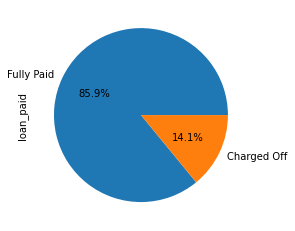

In [184]:
dataset['loan_paid'].value_counts(normalize=True).plot.pie(labels=['Fully Paid', 'Charged Off'],autopct='%1.1f%%')

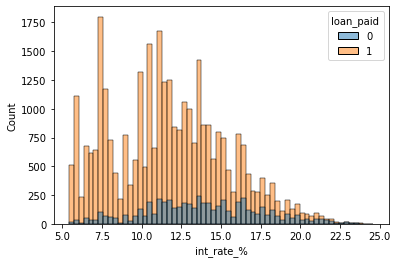

In [215]:
ax=sns.histplot(data=dataset, x='int_rate_%', hue='loan_paid')

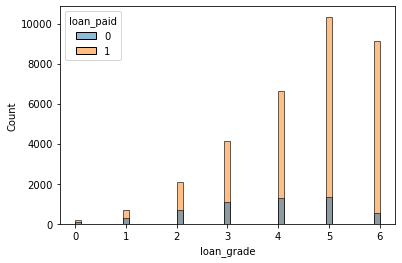

In [212]:
#sns.histplot(data=dataset, x='loan_grade')
ax=sns.histplot(data=dataset, x='loan_grade', hue='loan_paid')

If you paid off your loan you were more likely to have a shorter term loan than someone who didn't pay off their loan.

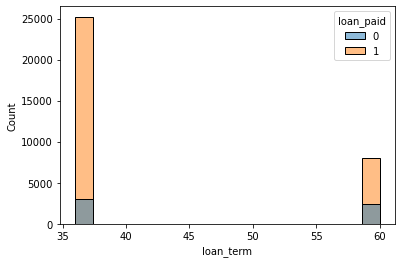

In [213]:
#dataset['loan_term'].value_counts(normalize=True).plot.pie(labels=['36 months', '60 months'],autopct='%1.1f%%')
ax=sns.histplot(data=dataset, x='loan_term', hue='loan_paid')

<a name="partb"/>

# PART B- MODEL BUILDING


<a name="all3"/>

# 1.0 ALL THREE VARIABLES

<a name="step1"/>

# Step 1 Prepare your data

[back to top](#top)

In [92]:
y=dataset['loan_paid']
X=dataset[['int_rate_%','loan_grade','loan_term']]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

<a name="step2"/>

# Step 2 Create your model: Train the model

[back to top](#top)

In [94]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Prediction of results i.e. Using the trained model above, predict the results on the test set.
This is y_predict!

In [95]:
lr.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

Let's get the prediction of the probabilty of that someoene will pay off the loan.

In [104]:
lr.predict_proba(X_test)[:,1]

array([0.81959879, 0.90667046, 0.90397967, ..., 0.94119427, 0.85697255,
       0.94597736])

* The class assignment of X is 1 if the prob that Y =1 is more than or equal to 0.5.
* else the class assignment of X is 0

$X_i$ = 1 if P ( Y=1 | X ) >= 0.5 else 0

y = f(X) =$\frac{1}{1+e^X\beta}$

To compare the models, we will use **accuracy score**. 

To read more about different available metrics for quantifying the quality of predictions in scikit-learn library, read [this](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). 

<a name="step3"/>

# Step 3 Determine the accuracy of your model

[back to top](#top)

In [97]:
accuracy = {}

In [98]:
accuracy['High_Correlate_roc'] = accuracy_score(y_test, lr.predict(X_test))
accuracy

{'High_Correlate_roc': 0.8526030228652629}

In [99]:
accuracy['High_Correlate_auc'] = roc_auc_score(y_test, lr.predict(X_test))
accuracy['High_Correlate_auc_prob'] = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
accuracy

{'High_Correlate_roc': 0.8526030228652629,
 'High_Correlate_auc': 0.5,
 'High_Correlate_auc_prob': 0.6717180569941306}

<a name="step4"/>

# Step 4 Visualization

<a name="confusion"/>

## Confusion Matrix

[back to top](#top)

In [108]:
#Get the confusion matrix
cf_matrix=confusion_matrix(y_test, lr.predict(X_test))
cf_matrix

array([[   0, 1141],
       [   0, 6600]])

In [155]:
#source code https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
#group_percentages = [“{0:.2%}”.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]

<AxesSubplot:>

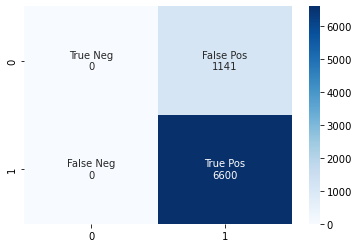

In [164]:
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<a name="roc"/>

## ROC Receiver Operating Characteristic

[back to top](#top)

In [170]:
probas = lr.predict_proba(X_test)[:, 1]

In [171]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]


In [172]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

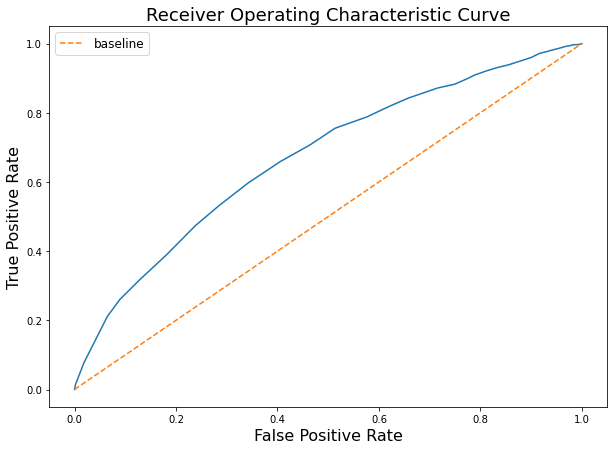

In [176]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.legend(fontsize=12);

In [174]:
roc_auc_score(y_test, preds)

0.5

In [175]:
roc_auc_score(y_test, probas)

0.6717180569941306

<a name="int_only"/>

# 2.0 int rate % only

<a name="step1-2"/>

# Step 1 Prepare your data

[back to top](#top)

In [177]:
y=dataset['loan_paid']
X=dataset[['int_rate_%']]

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

<a name="step2-2"/>

# Step 2 Create your model: Train the model

[back to top](#top)

In [179]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

<a name="step3-2"/>

# Step 3 Determine the accuracy of your model

[back to top](#top)

In [180]:
accuracy['Int_rate_roc'] = accuracy_score(y_test, lr.predict(X_test))
accuracy

{'High_Correlate_roc': 0.8526030228652629,
 'High_Correlate_auc': 0.5,
 'High_Correlate_auc_prob': 0.6717180569941306,
 'Int_rate_roc': 0.8584162252938897}

In [181]:
accuracy['Int_rate_auc'] = roc_auc_score(y_test, lr.predict(X_test))
accuracy['Int_rate_auc_prob'] = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
accuracy

{'High_Correlate_roc': 0.8526030228652629,
 'High_Correlate_auc': 0.5,
 'High_Correlate_auc_prob': 0.6717180569941306,
 'Int_rate_roc': 0.8584162252938897,
 'Int_rate_auc': 0.5003809598347916,
 'Int_rate_auc_prob': 0.6431941446562642}

<a name="step4-2"/>

# Step 4 Visualization

<a name="confusion-2"/>

## Confusion Matrix

[back to top](#top)

In [183]:
#Get the confusion matrix
cf_matrix=confusion_matrix(y_test, lr.predict(X_test))
cf_matrix

array([[   1, 1095],
       [   1, 6644]])

In [184]:
#source code https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
#group_percentages = [“{0:.2%}”.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]

<AxesSubplot:>

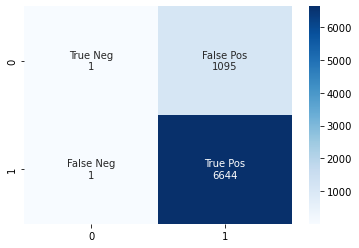

In [185]:
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<a name="roc-2"/>

## ROC Receiver Operating Characteristic

[back to top](#top)

In [186]:
probas = lr.predict_proba(X_test)[:, 1]

In [187]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [188]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

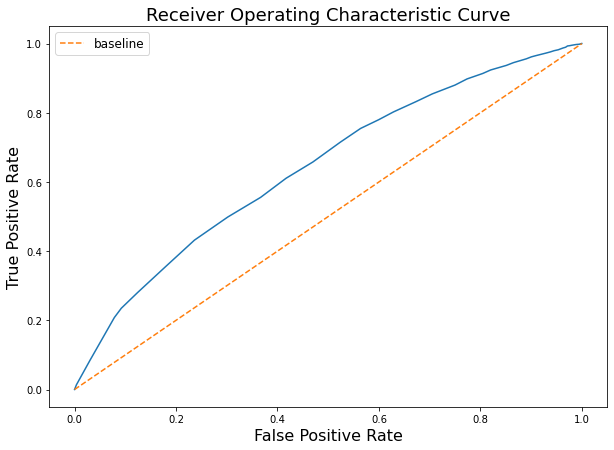

In [189]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.legend(fontsize=12);


<a name="int_loan"/>

# 3.0 int rate % and loan grade

<a name="step1-3"/>

# Step 1 Prepare your data

[back to top](#top)

In [190]:
y=dataset['loan_paid']
X=dataset[['int_rate_%','loan_grade']]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

<a name="step2-3"/>

# Step 2 Create your model: Train the model

[back to top](#top)

In [192]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

<a name="step3-3"/>

# Step 3 Determine the accuracy of your model

[back to top](#top)

In [193]:
accuracy['Int_rate_grade_roc'] = accuracy_score(y_test, lr.predict(X_test))
accuracy

{'High_Correlate_roc': 0.8526030228652629,
 'High_Correlate_auc': 0.5,
 'High_Correlate_auc_prob': 0.6717180569941306,
 'Int_rate_roc': 0.8584162252938897,
 'Int_rate_auc': 0.5003809598347916,
 'Int_rate_auc_prob': 0.6431941446562642,
 'Int_rate_grade_roc': 0.8562201265986307}

In [194]:
accuracy['Int_rate_grade_auc'] = roc_auc_score(y_test, lr.predict(X_test))
accuracy['Int_rate__grade_auc_prob'] = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
accuracy

{'High_Correlate_roc': 0.8526030228652629,
 'High_Correlate_auc': 0.5,
 'High_Correlate_auc_prob': 0.6717180569941306,
 'Int_rate_roc': 0.8584162252938897,
 'Int_rate_auc': 0.5003809598347916,
 'Int_rate_auc_prob': 0.6431941446562642,
 'Int_rate_grade_roc': 0.8562201265986307,
 'Int_rate_grade_auc': 0.5,
 'Int_rate__grade_auc_prob': 0.6668411964596818}

----